Copernicus is the Earth Observation component of the European Union’s space programme (copernicus.eu). Copernicus data offers downloading using MOTU Service, "a Web Server allowing to handle and extract oceanographic huge volumes of data, creating the connection between heterogeneous data providers and end-users" (help.marine.copernicus.eu). More information on MOTU can be accessed [here](https://help.marine.copernicus.eu/en/articles/4796533-what-are-the-motu-apis). You will need to register for a Copernicus account in order to access the data and run this notebook.

We will download the [Level-3 data](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L3_MY_009_103/description) non-gap-filled data and the [Level-4 gap-filled daily data](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L4_MY_009_104).

* [Daily Level 3 chl data](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L3_MY_009_103/files?subdataset=cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D_202311) id: cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D
* [Daily Level 4 chl data](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L4_MY_009_104/files?subdataset=cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D_202311) id: cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D

## Authenticate

Run this once. Afterwards the authentication file will be saved to your home directory.

## Import necessary libraries

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob, subprocess
import copernicusmarine

## Download data

This is an example command to download one day of data. The main command is `copernicus.subset()`. We will be downloading these datasets: cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D and 
cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D.

In [ ]:
# Get help like so
help(copernicusmarine.subset)

In [ ]:
copernicusmarine.subset(
   dataset_id = "cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D",
   variables = "",
   start_datetime = "2023-08-21T00:00:00",
   end_datetime = "2023-08-21T00:00:00",
   minimum_longitude = 60,
   maximum_longitude = 80, 
   minimum_latitude = 5,
   maximum_latitude = 25, 
   output_directory = 'data/motu/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D',
   output_filename = '20230821',
   force_download = True,
)

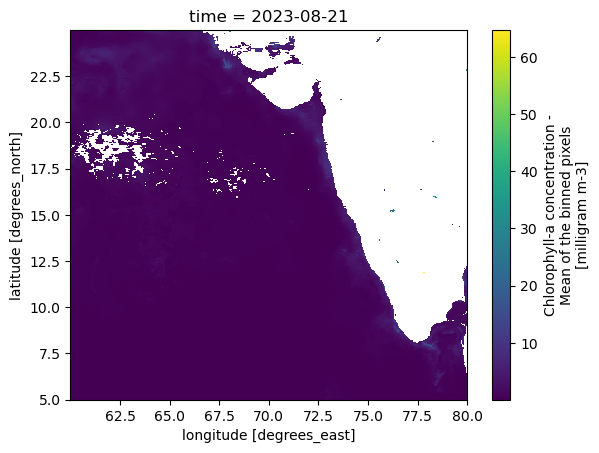

In [6]:
ds = xr.open_dataset('data/motu/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/20230821.nc')
ds['CHL'].sel(time="2023-08-21").plot()

## Load the download function

See bottom of the notebook for a copy of this function. Default is to save the files in `~/shared/data/copernicus` in a folder named by the dataset id.

In [7]:
%run -i "~/indian-ocean-zarr/notebooks/functions.py"

## Download the products

Download and then load and examine a test nc file.

In [ ]:
download_copernicus(
    "cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D", 
    "1997-10-01", "2024-06-30"
)

In [3]:
ds = xr.open_dataset('~/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D/199710.nc')
ds

<xarray.Dataset> Size: 613MB
Dimensions:          (time: 31, latitude: 1056, longitude: 1440)
Coordinates:
  * latitude         (latitude) float32 4kB -11.98 -11.94 -11.9 ... 31.94 31.98
  * longitude        (longitude) float32 6kB 42.02 42.06 42.1 ... 101.9 102.0
  * time             (time) datetime64[ns] 248B 1997-10-01 ... 1997-10-31
Data variables:
    CHL              (time, latitude, longitude) float32 189MB ...
    CHL_uncertainty  (time, latitude, longitude) float64 377MB ...
    flags            (time, latitude, longitude) int8 47MB ...
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L4_MY_009_104
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-11-20T15:24:55Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l4-gapf...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0
    copernicusmarine_version:        1.3.1

Now download the raw level 3 data with many gaps.

In [ ]:
download_copernicus(
    "cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D", 
    "1997-10-01", "2024-06-30", 
    vars=['CHL', 'CHL_uncertainty', 'flags']
)

In [11]:
ds = xr.open_dataset('~/shared/data/copernicus/cmems_obs-oc_glo_bgc-plankton_my_l3-multi-4km_P1D/199710.nc')
ds

<xarray.Dataset> Size: 613MB
Dimensions:          (time: 31, latitude: 1056, longitude: 1440)
Coordinates:
  * latitude         (latitude) float32 4kB -11.98 -11.94 -11.9 ... 31.94 31.98
  * longitude        (longitude) float32 6kB 42.02 42.06 42.1 ... 101.9 102.0
  * time             (time) datetime64[ns] 248B 1997-10-01 ... 1997-10-31
Data variables:
    CHL              (time, latitude, longitude) float32 189MB ...
    CHL_uncertainty  (time, latitude, longitude) float64 377MB ...
    flags            (time, latitude, longitude) int8 47MB ...
Attributes: (12/92)
    Conventions:                     CF-1.8, ACDD-1.3
    DPM_reference:                   GC-UD-ACRI-PUG
    IODD_reference:                  GC-UD-ACRI-PUG
    acknowledgement:                 The Licensees will ensure that original ...
    citation:                        The Licensees will ensure that original ...
    cmems_product_id:                OCEANCOLOUR_GLO_BGC_L3_MY_009_103
    ...                              ...
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-04-16T21:12:05Z
    title:                           cmems_obs-oc_glo_bgc-plankton_my_l3-mult...
    westernmost_longitude:           -180.0
    westernmost_valid_longitude:     -180.0
    copernicusmarine_version:        1.3.1

**The cmems_obs-oc_glo_bgc-plankton_my_l4-multi-4km_P1M product has many variables (plankton spp) and each month would be 3.8 GB.** I will only download the same variables that are in the gapfree product.

The data will be processed in the `02-data-processing.ipynb` notebook.

## Combine data

## Download function

In [7]:
def download_copernicus(dataset, date_start, date_end,  vars="", lat1=-12, lat2=32, lon1=42, lon2=102, path='/home/jovyan/shared/data/copernicus'):
    """
    dataset: dataset_id, example cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D
    vars: copernicus variables to write, example ['CHL']
    date_start: formatted as YYYY-MM-DD or numpy.datetime64(
    date_end: formatted as YYYY-MM-DD (right-exclusive)
    """

    path_folder = f'{path}/{dataset}'
    if not os.path.exists(path_folder):
        os.makedirs(path_folder)
    sliced_data_filename = '{year}{month}.nc'

    months = pd.date_range(date_start, date_end, freq="ME")
    for month in months:
        yr=month.year
        mon="{:02d}".format(month.month)
        start_date=f'{yr}-{mon}-01'
     
        export_file = sliced_data_filename.format(year = month.year, month = "{:02d}".format(month.month))

        filpath=copernicusmarine.subset(
           dataset_id = dataset,
           variables = vars,
           start_datetime = start_date,
           end_datetime = month,
           minimum_longitude = lon1,
           maximum_longitude = lon2, 
           minimum_latitude = lat1,
           maximum_latitude = lat2, 
           output_directory = path_folder,
           output_filename = export_file,
           force_download = True,
           overwrite_output_data = True
        )